In [ ]:
# 🧠 3. Option rapide de test

# Si tu veux tester sans entraîner, tu peux essayer :

# facebook/mask2former-swin-large-ade20k (scènes naturelles, paysages) — parfois un peu plus sensible aux textures.

# Ou un modèle spécialisé en segmentation satellite comme :

# nvidia/segformer-b5-finetuned-ade20k

# openmmlab/upernet-convnext fine-tuné sur LoveDA (dataset urbain/satellite)

# microsoft/beit-large-patch16-512 (bon en features visuels génériques)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import shutil
from tqdm import tqdm

# Répertoire contenant toutes les images initiales
ortho_dir = "drive/MyDrive/Pebble_bed_instance_segmentation/data_processed/ortho_croped/RGB/2013"
mnt_dir = "drive/MyDrive/Pebble_bed_instance_segmentation/data_processed/mnt_croped/2013"
label_dir = "drive/MyDrive/Pebble_bed_instance_segmentation/data_processed/seg_mask_croped/2013"
output_base = "dataset_split"

if os.path.exists(output_base):
    shutil.rmtree(output_base)

# Liste de toutes les images (chemins complets)
all_ortho = [os.path.join(ortho_dir, f) for f in os.listdir(ortho_dir) if f.lower().endswith('.npy')]

# Mélanger la liste pour la randomisation
random.shuffle(all_ortho)

# Calcul des tailles
n_total = len(all_ortho)
n_train = int(0.8 * n_total)
n_val = int(0.8 * (n_total - n_train))  # 80% des 20% restants
n_test = n_total - n_train - n_val

# Découpage
train_ortho = all_ortho[:n_train]
val_ortho = all_ortho[n_train:n_train + n_val]
test_ortho = all_ortho[n_train + n_val:]

train_ids = [file_name.split('_')[-1].split('.')[0] for file_name in train_ortho]
val_ids = [file_name.split('_')[-1].split('.')[0] for file_name in val_ortho]
test_ids = [file_name.split('_')[-1].split('.')[0] for file_name in test_ortho]

all_mnts = [os.path.join(mnt_dir, f) for f in os.listdir(mnt_dir) if f.lower().endswith('.npy')]

train_mnt = [mnt for mnt in all_mnts if mnt.split('_')[-1].split('.')[0] in train_ids]
val_mnt = [mnt for mnt in all_mnts if mnt.split('_')[-1].split('.')[0] in val_ids]
test_mnt = [mnt for mnt in all_mnts if mnt.split('_')[-1].split('.')[0] in test_ids]

all_labels = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.lower().endswith('.npy')]

train_label = [label for label in all_labels if label.split('_')[-1].split('.')[0] in train_ids]
val_label = [label for label in all_labels if label.split('_')[-1].split('.')[0] in val_ids]
test_label = [label for label in all_labels if label.split('_')[-1].split('.')[0] in test_ids]

assert len(train_ortho) == len(train_label)
assert len(val_ortho) == len(val_label)
assert len(test_ortho) == len(test_label)

splits = ['train', 'val', 'test']

for split in splits:
  os.makedirs(os.path.join(output_base, 'ortho', split), exist_ok=True)
  os.makedirs(os.path.join(output_base, 'mnt', split), exist_ok=True)
  os.makedirs(os.path.join(output_base, 'seg_mask', split), exist_ok=True)

# Copie des fichiers
print('Saving train_ortho')
for file in tqdm(train_ortho):
    shutil.copy(file, os.path.join(output_base, 'ortho', 'train'))
print('Saving val_ortho')
for file in  tqdm(val_ortho):
    shutil.copy(file, os.path.join(output_base, 'ortho', 'val'))
print('Saving test_ortho')
for file in  tqdm(test_ortho):
    shutil.copy(file, os.path.join(output_base, 'ortho', 'test'))
print('Saving train_mnt')
for file in tqdm(train_mnt):
    shutil.copy(file, os.path.join(output_base, 'mnt', 'train'))
print('Saving val_mnt')
for file in  tqdm(val_mnt):
    shutil.copy(file, os.path.join(output_base, 'mnt', 'val'))
print('Saving test_mnt')
for file in  tqdm(test_mnt):
    shutil.copy(file, os.path.join(output_base, 'mnt', 'test'))
print('Saving train_label')
for file in  tqdm(train_label):
    shutil.copy(file, os.path.join(output_base, 'seg_mask', 'train'))
print('Saving val_label')
for file in  tqdm(val_label):
    shutil.copy(file, os.path.join(output_base, 'seg_mask', 'val'))
print('Saving test_label')
for file in  tqdm(test_label):
    shutil.copy(file, os.path.join(output_base, 'seg_mask', 'test'))

print(f"\n✅ Répartition terminée : {len(train_ortho)} train, {len(val_ortho)} val, {len(test_ortho)} test.")

Saving train_ortho


100%|██████████| 418/418 [00:50<00:00,  8.25it/s]


Saving val_ortho


100%|██████████| 84/84 [00:07<00:00, 11.89it/s]


Saving test_ortho


100%|██████████| 21/21 [00:01<00:00, 19.85it/s]


Saving train_mnt


100%|██████████| 418/418 [06:59<00:00,  1.00s/it]


Saving val_mnt


100%|██████████| 84/84 [01:26<00:00,  1.03s/it]


Saving test_mnt


100%|██████████| 21/21 [00:21<00:00,  1.05s/it]


Saving train_label


100%|██████████| 418/418 [05:21<00:00,  1.30it/s]


Saving val_label


100%|██████████| 84/84 [01:00<00:00,  1.39it/s]


Saving test_label


100%|██████████| 21/21 [00:15<00:00,  1.34it/s]


✅ Répartition terminée : 418 train, 84 val, 21 test.


In [3]:
id2label = {1: 'pebble_bed'}
label2id = {'pebble_bed': 1}

In [4]:
import numpy as np

label_list = os.listdir(label_dir)
label_list.sort()

id_of_crops_with_pebble_bed = []

for idx, label in enumerate(label_list):
  label_arr = np.load(f'{label_dir}/{label}')
  if np.sum(label_arr) > 0:
    id_of_crops_with_pebble_bed.append(idx)

In [5]:
# ortho_dir = "drive/MyDrive/Pebble_bed_instance_segmentation/data_processed/ortho_croped/RGB/2013"

[ 0 72 73]


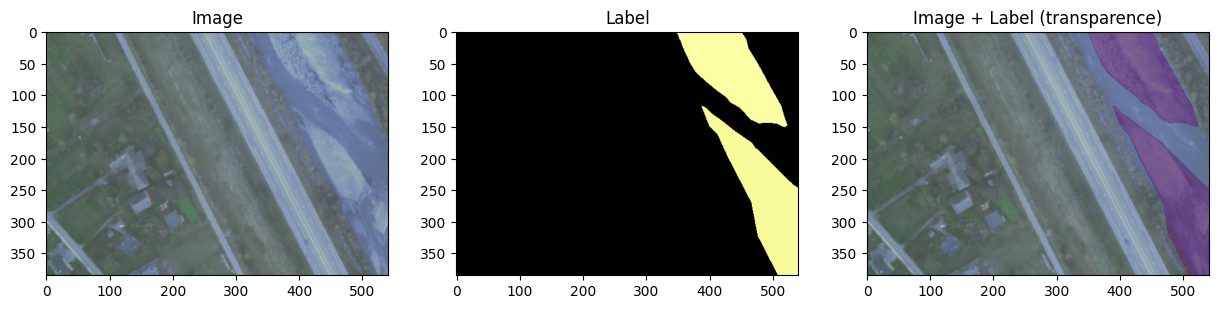

In [6]:
import numpy as np
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt

id_to_viz = id_of_crops_with_pebble_bed[13]

img_list = os.listdir(ortho_dir)
img_list.sort()
img_arr = np.load(f'{ortho_dir}/{img_list[id_to_viz]}')

label_list = os.listdir(label_dir)
label_list.sort()
label_arr = np.load(f'{label_dir}/{label_list[id_to_viz]}')[1, :, :] #### importer la fonction pour étaler les valeurs d'ids pour représentation plus jolie

print(np.unique(label_arr))

img = Image.fromarray(img_arr)

label = Image.fromarray(label_arr)

mask = label_arr != 0

fig, axarr = plt.subplots(1, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

axarr[0].imshow(img)
axarr[0].set_title("Image")

axarr[1].imshow(label, cmap=cm.inferno)
axarr[1].set_title("Label")

# Superposition : image + label avec transparence
axarr[2].imshow(img)
# On superpose le label avec alpha=0.5 (transparence) et seulement où mask=True
axarr[2].imshow(np.ma.masked_where(~mask, label_arr),
                cmap=cm.inferno, alpha=0.5, vmin=0, vmax=255)
axarr[2].set_title("Image + Label (transparence)");

In [7]:
train_ortho_arr = np.array([np.load(os.path.join('dataset_split/ortho/train', ortho)) for ortho in os.listdir('dataset_split/ortho/train')])
train_label_arr = np.array([np.load(os.path.join('dataset_split/seg_mask/train', ortho)) for ortho in os.listdir('dataset_split/seg_mask/train')])

val_ortho_arr = np.array([np.load(os.path.join('dataset_split/ortho/val', ortho)) for ortho in os.listdir('dataset_split/ortho/val')])
val_label_arr = np.array([np.load(os.path.join('dataset_split/seg_mask/val', ortho)) for ortho in os.listdir('dataset_split/seg_mask/val')])

test_ortho_arr = np.array([np.load(os.path.join('dataset_split/ortho/test', ortho)) for ortho in os.listdir('dataset_split/ortho/test')])
test_label_arr = np.array([np.load(os.path.join('dataset_split/seg_mask/test', ortho)) for ortho in os.listdir('dataset_split/seg_mask/test')])


In [8]:
# # 🔹 Identifier les images "vides" (aucune instance annotée)
# # On suppose que la somme sur tout le masque indique la présence d’objets
# empty_indices = [i for i, lbl in enumerate(train_label_arr) if np.sum(lbl) == 0]
# non_empty_indices = [i for i, lbl in enumerate(train_label_arr) if np.sum(lbl) > 0]

# # 🔹 Sélectionner 50 % des images vides aléatoirement
# np.random.seed(42)  # pour reproductibilité
# num_to_keep = len(empty_indices) // 2
# selected_empty_indices = np.random.choice(empty_indices, num_to_keep, replace=False)

# # 🔹 Fusionner les indices gardés
# final_indices = np.concatenate([non_empty_indices, selected_empty_indices])
# np.random.shuffle(final_indices)

# # 🔹 Filtrer les arrays
# train_ortho_arr = train_ortho_arr[final_indices]
# train_label_arr = train_label_arr[final_indices]

# print(f"✅ Jeu de train réduit : {len(train_ortho_arr)} images (dont {len(selected_empty_indices)} vides)")

import numpy as np

# 🔹 Identifier les images avec au moins une instance annotée
non_empty_indices = [i for i, lbl in enumerate(train_label_arr) if np.sum(lbl) > 0]

# 🔹 Filtrer les arrays (on exclut les images vides)
train_ortho_arr = train_ortho_arr[non_empty_indices]
train_label_arr = train_label_arr[non_empty_indices]

print(f"✅ Jeu de train filtré : {len(train_ortho_arr)} images conservées (toutes avec au moins une instance)")

✅ Jeu de train filtré : 104 images conservées (toutes avec au moins une instance)


In [9]:
import numpy as np
from torch.utils.data import Dataset
from transformers import Mask2FormerImageProcessor

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self, img, label, processor, transform=None):
        """
        Args:
            dataset
        """
        self.img = img
        self.label = label
        self.processor = processor
        self.transform = transform

    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):
        image = np.array(self.img[idx])

        instance_seg = np.array(self.label[idx])[1,:,:]
        class_id_map = np.array(self.label[idx])[0,:,:] #### label shape is C, H, W
        class_labels = np.unique(class_id_map)

        inst2class = {}
        for label in class_labels:
            instance_ids = np.unique(instance_seg[class_id_map == label])
            inst2class.update({i: label for i in instance_ids})

        # apply transforms
        if self.transform is not None:
            transformed = self.transform(image=image, mask=instance_seg)
            image, instance_seg = transformed['image'], transformed['mask']

        # convert to C, H, W
        image = image.transpose(2,0,1)

        if class_labels.shape[0] == 1 and class_labels[0] == 0:
            # Some image does not have annotation (all ignored)
            inputs = self.processor([image], return_tensors="pt")
            inputs = {k:v.squeeze() for k,v in inputs.items()}
            inputs["mask_labels"] = torch.zeros((0, inputs["pixel_values"].shape[-2], inputs["pixel_values"].shape[-1]))
            inputs["class_labels"] = torch.tensor([0])
        else:
          inputs = self.processor([image], [instance_seg], instance_id_to_semantic_id=inst2class, return_tensors="pt")
          inputs = {k: v.squeeze() if isinstance(v, torch.Tensor) else v[0] for k,v in inputs.items()}

        return inputs

processor = Mask2FormerImageProcessor(reduce_labels=True, ignore_index=255, do_resize=True, do_rescale=True , do_normalize=True)

train_dataset = ImageSegmentationDataset(train_ortho_arr, train_label_arr, processor=processor)
val_dataset = ImageSegmentationDataset(val_ortho_arr, val_label_arr, processor=processor)
test_dataset = ImageSegmentationDataset(test_ortho_arr, test_label_arr, processor=processor)

/tmp/ipython-input-1145586254.py:53: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: 'reduce_labels'
  processor = Mask2FormerImageProcessor(reduce_labels=True, ignore_index=255, do_resize=True, do_rescale=True , do_normalize=True)


In [10]:
import torch

print("#########################################")
print("Cas d'une image sans instance à segmenter")
print("#########################################")

inputs = train_dataset[0]
for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)

#########################################
Cas d'une image sans instance à segmenter
#########################################
pixel_values torch.Size([3, 800, 1152])
pixel_mask torch.Size([800, 1152])
mask_labels torch.Size([4, 800, 1152])
class_labels torch.Size([4])


In [11]:
print("#############################################")
print("Cas d'une image avec une instance à segmenter")
print("#############################################")

inputs = train_dataset[3]
for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)

#############################################
Cas d'une image avec une instance à segmenter
#############################################
pixel_values torch.Size([3, 800, 1152])
pixel_mask torch.Size([800, 1152])
mask_labels torch.Size([2, 800, 1152])
class_labels torch.Size([2])


In [12]:
print("####################################################")
print("Cas d'une image avec plusieurs instances à segmenter")
print("####################################################")

inputs = train_dataset[7]
for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)

####################################################
Cas d'une image avec plusieurs instances à segmenter
####################################################
pixel_values torch.Size([3, 800, 1152])
pixel_mask torch.Size([800, 1152])
mask_labels torch.Size([3, 800, 1152])
class_labels torch.Size([3])


In [13]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = torch.stack([example["pixel_values"] for example in batch])
    pixel_mask = torch.stack([example["pixel_mask"] for example in batch])
    class_labels = [example["class_labels"] for example in batch]
    mask_labels = [example["mask_labels"] for example in batch]
    return {"pixel_values": pixel_values, "pixel_mask": pixel_mask, "mask_labels": mask_labels, "class_labels": class_labels}

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [14]:
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [15]:
import torch

batch = next(iter(train_dataloader))

while len(batch['class_labels'][0]) < 5:
  batch = next(iter(train_dataloader))

for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,v[0].shape)

pixel_values torch.Size([1, 3, 800, 1152])
pixel_mask torch.Size([1, 800, 1152])
mask_labels torch.Size([5, 800, 1152])
class_labels torch.Size([5])


In [16]:
batch

{'pixel_values': tensor([[[[ 0.0741,  0.0741,  0.0569,  ...,  0.1597,  0.1426,  0.1426],
           [ 0.1083,  0.1083,  0.0912,  ...,  0.1597,  0.1426,  0.1426],
           [ 0.1768,  0.1768,  0.1597,  ...,  0.1597,  0.1426,  0.1426],
           ...,
           [-0.2513, -0.2513, -0.2684,  ..., -0.6794, -0.6623, -0.6623],
           [-0.2342, -0.2342, -0.2342,  ..., -0.6623, -0.6452, -0.6452],
           [-0.2342, -0.2342, -0.2171,  ..., -0.6623, -0.6452, -0.6452]],
 
          [[ 0.4853,  0.4853,  0.4678,  ...,  0.5203,  0.5203,  0.5203],
           [ 0.5378,  0.5378,  0.5203,  ...,  0.5203,  0.5203,  0.5203],
           [ 0.6254,  0.6254,  0.6078,  ...,  0.5378,  0.5203,  0.5203],
           ...,
           [ 0.1527,  0.1527,  0.1352,  ..., -0.4601, -0.4426, -0.4426],
           [ 0.1702,  0.1702,  0.1702,  ..., -0.4426, -0.4251, -0.4251],
           [ 0.1702,  0.1702,  0.1877,  ..., -0.4251, -0.4076, -0.4076]],
 
          [[ 1.2282,  1.2282,  1.2108,  ...,  1.3851,  1.3851,  1.3851

Label: pebble_bed


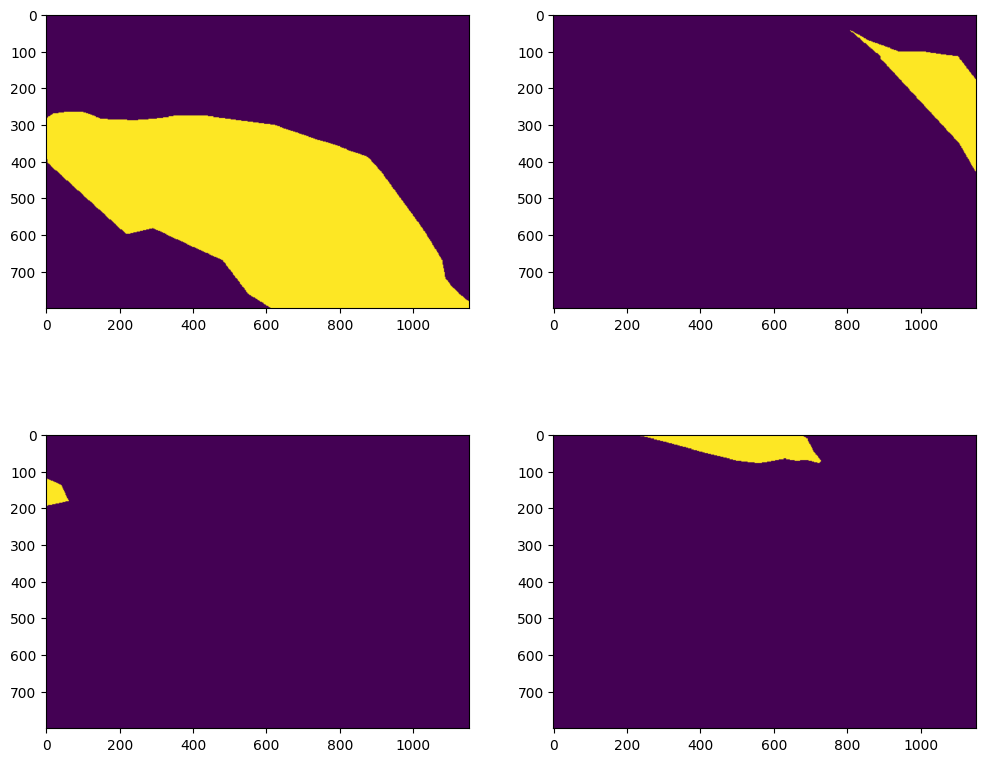

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, figsize=(12, 10))

print("Label:", id2label[batch["class_labels"][0][1].item()])

visual_mask1 = (batch["mask_labels"][0][1].numpy() * 255).astype(np.uint8)
img1 = Image.fromarray(visual_mask1)
axarr[0, 0].imshow(img1)

visual_mask2 = (batch["mask_labels"][0][2].numpy() * 255).astype(np.uint8)
img2 = Image.fromarray(visual_mask2)
axarr[0, 1].imshow(img2)

visual_mask1 = (batch["mask_labels"][0][3].numpy() * 255).astype(np.uint8)
img1 = Image.fromarray(visual_mask1)
axarr[1, 0].imshow(img1)

visual_mask2 = (batch["mask_labels"][0][4].numpy() * 255).astype(np.uint8)
img2 = Image.fromarray(visual_mask2)
axarr[1, 1].imshow(img2)

In [18]:
from transformers import MaskFormerForInstanceSegmentation

# Replace the head of the pre-trained model
# We specify ignore_mismatched_sizes=True to replace the already fine-tuned classification head by a new one
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of MaskFormerForInstanceSegmentation were not initialized from the model checkpoint at facebook/maskformer-swin-base-ade and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([2, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([2]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0

for epoch in range(10):
  print("Epoch:", epoch + 1)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(
              pixel_values=batch["pixel_values"].to(device),
              mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
              class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )

      # Backward propagation
      loss = outputs.loss
      loss.backward()

      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

Epoch: 1


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7308619618415833
Loss: 0.7899623125201405
Epoch: 2


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7806154735031582
Loss: 0.7823844803542626
Epoch: 3


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7822107297666906
Loss: 0.7550310037282678
Epoch: 4


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7575128960152404
Loss: 0.7326707614824789
Epoch: 5


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7318520211487365
Loss: 0.7163217012667794
Epoch: 6


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7165098127671258
Loss: 0.8154234806264656
Epoch: 7


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.8179971553564072
Loss: 0.8176901645084907
Epoch: 8


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.8168924351533254
Loss: 0.7942870504462101
Epoch: 9


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7931534577460707
Loss: 0.7733274252180885
Epoch: 10


  0%|          | 0/104 [00:00<?, ?it/s]

Loss: 0.7727627476067019
Loss: 0.7588313855697817


In [ ]:
running_loss

2394.6492437124252

# test d'inférence

In [41]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
model.to(device)

with torch.no_grad():
    for batch in tqdm(train_dataloader):
      if len(batch['class_labels'][0]) != 1:
        # Données sur GPU
        pixel_values = batch["pixel_values"].to(device)
        pixel_mask = batch["pixel_mask"].to(device)

        # Inférence
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

        # Post-traitement avec le processor
        target_sizes = [pixel_values.shape[-2:]] * pixel_values.size(0)
        results = processor.post_process_instance_segmentation(outputs, target_sizes=target_sizes)
        print(results[0]['segments_info'][0])

  0%|          | 0/104 [00:00<?, ?it/s]

{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.897552}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.900807}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.905565}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.901581}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.904225}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.919684}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.934075}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.928436}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.902392}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.879987}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.913634}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.900362}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.880798}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.884474}
{'id': 0, 'label_id': 0, 'was_fused': False, 'score': 0.910752}
{'id': 0, 'label_id': 0, 'was_fused': Fa

In [35]:
import torch
from PIL import Image

pred = results[0]["segmentation"]

torch.unique(pred)

tensor([0.])

In [ ]:
# import torch
# from tqdm.auto import tqdm

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.eval()
# model.to(device)

# # Fonctions métriques simples
# def compute_iou(pred_mask, true_mask):
#     intersection = torch.logical_and(pred_mask, true_mask).sum().item()
#     union = torch.logical_or(pred_mask, true_mask).sum().item()
#     return intersection / union if union > 0 else 1.0

# def compute_dice(pred_mask, true_mask):
#     intersection = torch.logical_and(pred_mask, true_mask).sum().item()
#     return (2 * intersection) / (pred_mask.sum().item() + true_mask.sum().item() + 1e-6)

# # Stockage pour les moyennes
# total_iou, total_dice = 0.0, 0.0
# num_images = 0

# with torch.no_grad():
#     for batch in tqdm(test_dataloader):
#       if len(batch['class_labels'][0]) != 1:

#         # Données sur GPU
#         pixel_values = batch["pixel_values"].to(device)
#         pixel_mask = batch["pixel_mask"].to(device)

#         # Inférence
#         outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

#         # Post-traitement avec le processor
#         target_sizes = [pixel_values.shape[-2:]] * pixel_values.size(0)
#         results = processor.post_process_instance_segmentation(outputs, target_sizes=target_sizes)

#         # Boucle sur les images du batch
#         for i, result in enumerate(results):
#             pred_mask = torch.tensor(np.array(result["segmentation"]) > 0).to(torch.bool)

#             # masque vrai (dans batch)
#             if batch["mask_labels"][i].shape[0] > 0:
#                 true_mask = batch["mask_labels"][i].any(dim=0)
#             else:
#                 # image sans instance
#                 true_mask = torch.zeros_like(pred_mask)

#             # Calcul des métriques
#             iou = compute_iou(pred_mask, true_mask)
#             dice = compute_dice(pred_mask, true_mask)

#             print(iou)

#             total_iou += iou
#             total_dice += dice
#             num_images += 1

# # Moyennes finales
# mean_iou = total_iou / num_images
# mean_dice = total_dice / num_images

# print(f"✅ Mean IoU: {mean_iou:.4f} | Mean Dice: {mean_dice:.4f}")

  0%|          | 0/21 [00:00<?, ?it/s]

0.0
0.0
0.0
0.0
0.0
✅ Mean IoU: 0.0000 | Mean Dice: 0.0000


In [ ]:
batch

{'pixel_values': tensor([[[[-0.0458, -0.0458, -0.0287,  ...,  2.2489,  2.2489,  2.2489],
           [-0.0287, -0.0287, -0.0116,  ...,  2.2489,  2.2489,  2.2489],
           [-0.0116,  0.0056,  0.0227,  ...,  2.2489,  2.2489,  2.2489],
           ...,
           [-0.5253, -0.5253, -0.5253,  ...,  2.2489,  2.2489,  2.2489],
           [-0.5253, -0.5253, -0.5082,  ...,  2.2489,  2.2489,  2.2489],
           [-0.5253, -0.5253, -0.5082,  ...,  2.2489,  2.2489,  2.2489]],
 
          [[ 0.4678,  0.4678,  0.4853,  ...,  2.4286,  2.4286,  2.4286],
           [ 0.4678,  0.4853,  0.5028,  ...,  2.4286,  2.4286,  2.4286],
           [ 0.4853,  0.5028,  0.5203,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [-0.2150, -0.2150, -0.2150,  ...,  2.4286,  2.4286,  2.4286],
           [-0.2150, -0.2150, -0.2150,  ...,  2.4286,  2.4286,  2.4286],
           [-0.2150, -0.2150, -0.2150,  ...,  2.4286,  2.4286,  2.4286]],
 
          [[ 1.3851,  1.3851,  1.3851,  ...,  2.6400,  2.6400,  2.6400

In [ ]:
# Données sur GPU
pixel_values = batch["pixel_values"].to(device)
pixel_mask = batch["pixel_mask"].to(device)

# Inférence
outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

In [ ]:
# Post-traitement avec le processor
target_sizes = [pixel_values.shape[-2:]] * pixel_values.size(0)
results = processor.post_process_instance_segmentation(outputs, target_sizes=target_sizes)

print(results)

# Boucle sur les images du batch
for i, result in enumerate(results):
  pred_mask = torch.tensor(np.array(result["segmentation"]) > 0).to(torch.bool)
  print(np.unique(pred_mask))

[{'segmentation': tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]]), 'segments_info': []}]
[False]


In [ ]:
pred_mask

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])